In [1]:
import os 
import sys
# fix this later!
sys.path.insert(0, '/home/sumry2023_cqx3/hypergraph_scattering')
from hypg_scattering.models.hyper_scattering_net import HSN

import dhg 
import torch 
import torch.optim as optim

from typing import Tuple, Optional 
from dhg.random import set_seed
from dhg import Graph
from dhg.models import GCN
from dhg.metrics import GraphVertexClassificationEvaluator as Evaluator
import time
import torch.nn.functional as F
import torch.nn as nn
import random
from tqdm import trange
import matplotlib.pyplot as plt

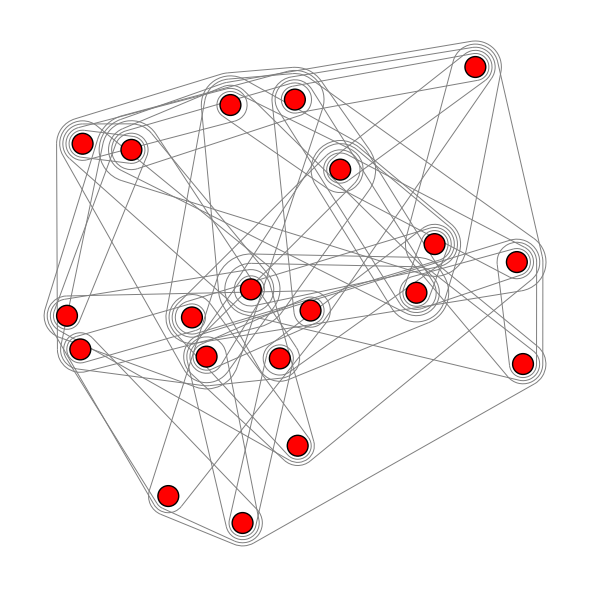

In [2]:
num_v = 20
num_e = 40
hg = dhg.random.hypergraph_Gnm(num_v, num_e, method = 'low_order_first')
hg.draw()

In [3]:
hg.D_v.values()

tensor([4., 4., 4., 4., 3., 7., 6., 5., 4., 5., 9., 4., 7., 8., 8., 7., 3., 8.,
        5., 7.])

In [ ]:
hg = dhg.random.hypergraph_Gnm(num_v, num_e, method = 'low_order_first')


In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
num_vertices = 15
hg = dhg.random.uniform_hypergraph_Gnp(3,num_vertices, .4).to(device)
signal_features = 2
X = torch.rand(num_vertices, signal_features).to(device)
Y = torch.zeros((hg.num_e, signal_features)).to(device)

hidden_channels = 16
out_channels = 1
net = HSN(signal_features, hidden_channels, 1).to(device)
#import pdb; pdb.set_trace()

node_pred, edge_pred = net(hg, X, Y)
node_pred.shape

torch.Size([15, 1])

In [6]:
num_v = 15; num_e = 30
hypergraph_dataset = [dhg.random.hypergraph_Gnm(num_v, num_e, method = 'low_order_first') for _ in range(50)]


In [10]:
net = HSN(signal_features, hidden_channels, 1).to(device)
random.shuffle(hypergraph_dataset)
for hg in hypergraph_dataset:
    hg = hg.to(device)
    signal_features = 2
    X = torch.rand(num_v, signal_features).to(device)
    Y = torch.zeros((hg.num_e, signal_features)).to(device)
    node_pred, edge_pred = net(hg, X, Y)